# Sales Analysis

**Import the required modules**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

%matplotlib inline - this line of code displays the output of plotting commands directly below the code cell that produced it.

___

**Read Data**

In [2]:
mydata = pd.read_excel('C:/Users/Prasad/Desktop/SalesAnalysis/superstore_sales.xlsx')

In [3]:
type(mydata)

pandas.core.frame.DataFrame

In [4]:
mydata.head()


# head() - the function returns top rows except the bottom n rows

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011


In [5]:
mydata.tail()

# tail() - the function returns the n bottom rows

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
51285,CA-2014-115427,2014-12-31,2015-01-04,Standard Class,Erica Bern,Corporate,California,United States,US,West,...,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,0.890,Medium,2014
51286,MO-2014-2560,2014-12-31,2015-01-05,Standard Class,Liz Preis,Consumer,Souss-Massa-Draâ,Morocco,Africa,Africa,...,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.4200,0.490,Medium,2014
51287,MX-2014-110527,2014-12-31,2015-01-02,Second Class,Charlotte Melton,Consumer,Managua,Nicaragua,LATAM,Central,...,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.0,12.3600,0.350,Medium,2014
51288,MX-2014-114783,2014-12-31,2015-01-06,Standard Class,Tamara Dahlen,Consumer,Chihuahua,Mexico,LATAM,North,...,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1,0.0,0.5600,0.199,Medium,2014
51289,CA-2014-156720,2014-12-31,2015-01-04,Standard Class,Jill Matthias,Consumer,Colorado,United States,US,West,...,Office Supplies,Fasteners,Bagged Rubber Bands,3.024,3,0.2,-0.6048,0.170,Medium,2014


In [6]:
mydata.shape

(51290, 21)

we have dataframe of 51290 rows and 21 columns.

**Summary Statistics**

In [7]:
mydata.describe().round()

,sales,quantity,discount,profit,shipping_cost,year
count,51290.0,51290.0,51290.0,51290.0,51290.0,51290.0
mean,246.0,3.0,0.0,29.0,26.0,2013.0
std,488.0,2.0,0.0,174.0,57.0,1.0
min,0.0,1.0,0.0,-6600.0,0.0,2011.0
25%,31.0,2.0,0.0,0.0,3.0,2012.0
50%,85.0,3.0,0.0,9.0,8.0,2013.0
75%,251.0,5.0,0.0,37.0,24.0,2014.0
max,22638.0,14.0,1.0,8400.0,934.0,2014.0


In [8]:
mydata.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')

In [9]:
mydata.info()


# info() - this function gives a concise summary of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        51290 non-null  object        
 1   order_date      51290 non-null  datetime64[ns]
 2   ship_date       51290 non-null  datetime64[ns]
 3   ship_mode       51290 non-null  object        
 4   customer_name   51290 non-null  object        
 5   segment         51290 non-null  object        
 6   state           51290 non-null  object        
 7   country         51290 non-null  object        
 8   market          51290 non-null  object        
 9   region          51290 non-null  object        
 10  product_id      51290 non-null  object        
 11  category        51290 non-null  object        
 12  sub_category    51290 non-null  object        
 13  product_name    51290 non-null  object        
 14  sales           51290 non-null  float64       
 15  qu

Check missing values

In [10]:
mydata.isna().sum()

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64

**THE OVERALL SALES TREND**

Getting month_year from order_date

In [11]:
mydata['month_year'] = mydata['order_date'].apply(lambda x: x.strftime('%Y-%m'))

grouping month_year by sales

In [12]:
tempdata = mydata.groupby('month_year').sum()['sales'].reset_index()

In [13]:
tempdata.head()

,month_year,sales
0,2011-01,98898.48886
1,2011-02,91152.15698
2,2011-03,145729.36736
3,2011-04,116915.76418
4,2011-05,146747.83610


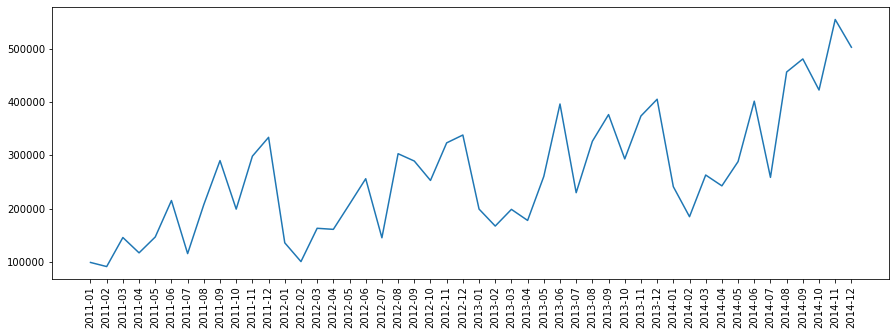

In [14]:
plt.figure(figsize=(15, 5))
plt.plot(tempdata['month_year'], tempdata['sales'])
plt.xticks(rotation='vertical', size=10)
plt.show()

**TOP 10 PRODUCTS BY SALES**

Grouping products by sales

In [15]:
topsales = pd.DataFrame(mydata.groupby('product_name').sum()['sales'])

Sorting the dataframe in descending order

In [16]:
topsales.sort_values(by=['sales'], inplace=True, ascending=False)

Top 10 products by sales

In [17]:
topsales[:10].round(2)

,sales
product_name,
"Apple Smart Phone, Full Size",86935.78
"Cisco Smart Phone, Full Size",76441.53
"Motorola Smart Phone, Full Size",73156.30
"Nokia Smart Phone, Full Size",71904.56
Canon imageCLASS 2200 Advanced Copier,61599.82
"Hon Executive Leather Armchair, Adjustable",58193.48
"Office Star Executive Leather Armchair, Adjustable",50661.68
"Harbour Creations Executive Leather Armchair, Adjustable",50121.52
"Samsung Smart Phone, Cordless",48653.46


**The most selling products**

Grouping products by quantity

In [18]:
bestprods = pd.DataFrame(mydata.groupby('product_name').sum()['quantity'])

Sorting the dataframe in descending order

In [19]:
bestprods.sort_values(by=['quantity'], inplace=True, ascending=False)

Most selling products

In [20]:
bestprods[:10]

,quantity
product_name,
Staples,876
"Cardinal Index Tab, Clear",337
"Eldon File Cart, Single Width",321
"Rogers File Cart, Single Width",262
"Sanford Pencil Sharpener, Water Color",259
"Stockwell Paper Clips, Assorted Sizes",253
"Avery Index Tab, Clear",252
"Ibico Index Tab, Clear",251
"Smead File Cart, Single Width",250


**THE MOST PREFERRED SHIP MODE**

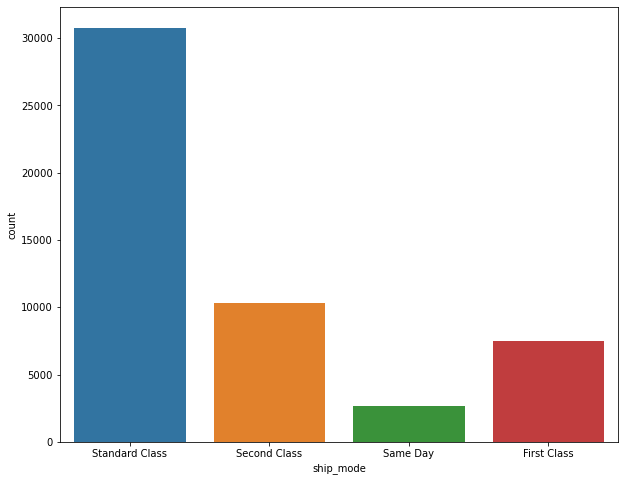

In [21]:
plt.figure(figsize=(10, 8))
sns.countplot(x='ship_mode', data=mydata)
plt.show()

**The most profitable category and sub-category**

In [22]:
catdata = pd.DataFrame(mydata.groupby(['category', 'sub_category']).sum()['profit'])
catdata.sort_values(['category','profit'], ascending=False).round(2)

profit
category        sub_category           
Technology      Copiers       258567.55
                Phones        216717.01
                Accessories   129626.31
                Machines       58867.87
Office Supplies Appliances    141680.59
                Storage       108461.49
                Binders        72449.85
                Paper          59207.68
                Art            57953.91
                Envelopes      29601.12
                Supplies       22583.26
                Labels         15010.51
                Fasteners      11525.42
Furniture       Bookcases     161924.42
                Chairs        141973.80
                Furnishings    46967.43
                Tables        -64083.39